In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize

In [2]:
train_file_path = '../dataset/train.jsonl'
test_file_path = '../dataset/test.jsonl'
valid_file_path = '../dataset/valid.jsonl'

In [3]:
train_df = pd.read_json(path_or_buf=train_file_path, lines=True)
test_df = pd.read_json(path_or_buf=test_file_path, lines=True)
valid_df = pd.read_json(path_or_buf=valid_file_path, lines=True)


# concat all data
df = pd.concat([train_df, test_df, valid_df])

df

,uid,text,extra,source,label
0,[urlsf_subset00]-[15],The dangers of Illinois as a ‘right to work’ s...,"{'source': 'openweb', 'variant': 'original'}",openweb,0
1,[urlsf_subset00]-[15],"The governor of Illinois, Gov. Rauner, has req...","{'source': 'chatgpt', 'variant': 'original'}",chatgpt,1
2,[urlsf_subset00]-[83],Check current weather conditions\n\nIt’s going...,"{'source': 'openweb', 'variant': 'original'}",openweb,0
3,[urlsf_subset00]-[83],Check current weather conditions It’s going to...,"{'variant': 'original', 'source': 'llama'}",llama,1
4,[urlsf_subset00]-[89],"On Thursday, the president of the United State...","{'source': 'openweb', 'variant': 'original'}",openweb,0
...,...,...,...,...,...
19645,[urlsf_subset06]-[390176],Diego Maradona has paid tribute to the late Al...,"{'source': 'chatgpt', 'variant': 'original'}",chatgpt,1
19646,[urlsf_subset06]-[390305],Tymee Holds A Guerilla Performance\n\n[by Yanc...,"{'source': 'openweb', 'variant': 'original'}",openweb,0
19647,[urlsf_subset06]-[390305],Tymee Holds A Guerilla Performance\n\n[by Yanc...,"{'variant': 'original', 'source': 'llama'}",llama,1
19648,[urlsf_subset06]-[390316],South Korea President Moon Jae-in requested a ...,"{'source': 'openweb', 'variant': 'original'}",openweb,0


In [4]:
# create a column with the length of the text
df['text_length'] = df['text'].apply(lambda x: len(x))

In [5]:
print(df.columns)

df

Index(['uid', 'text', 'extra', 'source', 'label', 'text_length'], dtype='object')


,uid,text,extra,source,label,text_length
0,[urlsf_subset00]-[15],The dangers of Illinois as a ‘right to work’ s...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,3389
1,[urlsf_subset00]-[15],"The governor of Illinois, Gov. Rauner, has req...","{'source': 'chatgpt', 'variant': 'original'}",chatgpt,1,2281
2,[urlsf_subset00]-[83],Check current weather conditions\n\nIt’s going...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,2216
3,[urlsf_subset00]-[83],Check current weather conditions It’s going to...,"{'variant': 'original', 'source': 'llama'}",llama,1,1422
4,[urlsf_subset00]-[89],"On Thursday, the president of the United State...","{'source': 'openweb', 'variant': 'original'}",openweb,0,2017
...,...,...,...,...,...,...
19645,[urlsf_subset06]-[390176],Diego Maradona has paid tribute to the late Al...,"{'source': 'chatgpt', 'variant': 'original'}",chatgpt,1,862
19646,[urlsf_subset06]-[390305],Tymee Holds A Guerilla Performance\n\n[by Yanc...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,1895
19647,[urlsf_subset06]-[390305],Tymee Holds A Guerilla Performance\n\n[by Yanc...,"{'variant': 'original', 'source': 'llama'}",llama,1,3000
19648,[urlsf_subset06]-[390316],South Korea President Moon Jae-in requested a ...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,3266


In [6]:
def text_process(mess):
    """
    Process text to:
    1. Remove punctuation (including all Unicode quotes)
    2. Convert text to lowercase
    3. Return cleaned text without removing stopwords
    """
    # Remove all punctuation using regex
    mess = re.sub(r"[^\w\s]", "", mess)

    # Convert the text to lowercase
    mess = mess.lower()

    # Return the cleaned text
    return mess

In [7]:
df['cleaned_text'] = df['text'].apply(text_process)

df

,uid,text,extra,source,label,text_length,cleaned_text
0,[urlsf_subset00]-[15],The dangers of Illinois as a ‘right to work’ s...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,3389,the dangers of illinois as a right to work sta...
1,[urlsf_subset00]-[15],"The governor of Illinois, Gov. Rauner, has req...","{'source': 'chatgpt', 'variant': 'original'}",chatgpt,1,2281,the governor of illinois gov rauner has reques...
2,[urlsf_subset00]-[83],Check current weather conditions\n\nIt’s going...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,2216,check current weather conditions\n\nits going ...
3,[urlsf_subset00]-[83],Check current weather conditions It’s going to...,"{'variant': 'original', 'source': 'llama'}",llama,1,1422,check current weather conditions its going to ...
4,[urlsf_subset00]-[89],"On Thursday, the president of the United State...","{'source': 'openweb', 'variant': 'original'}",openweb,0,2017,on thursday the president of the united states...
...,...,...,...,...,...,...,...
19645,[urlsf_subset06]-[390176],Diego Maradona has paid tribute to the late Al...,"{'source': 'chatgpt', 'variant': 'original'}",chatgpt,1,862,diego maradona has paid tribute to the late al...
19646,[urlsf_subset06]-[390305],Tymee Holds A Guerilla Performance\n\n[by Yanc...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,1895,tymee holds a guerilla performance\n\nby yanch...
19647,[urlsf_subset06]-[390305],Tymee Holds A Guerilla Performance\n\n[by Yanc...,"{'variant': 'original', 'source': 'llama'}",llama,1,3000,tymee holds a guerilla performance\n\nby yanch...
19648,[urlsf_subset06]-[390316],South Korea President Moon Jae-in requested a ...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,3266,south korea president moon jaein requested a c...


In [8]:
df['tokens'] = df['cleaned_text'].apply(word_tokenize)

df['token_length'] = df['tokens'].apply(lambda x: len(x))

df

,uid,text,extra,source,label,text_length,cleaned_text,tokens,token_length
0,[urlsf_subset00]-[15],The dangers of Illinois as a ‘right to work’ s...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,3389,the dangers of illinois as a right to work sta...,"[the, dangers, of, illinois, as, a, right, to,...",563
1,[urlsf_subset00]-[15],"The governor of Illinois, Gov. Rauner, has req...","{'source': 'chatgpt', 'variant': 'original'}",chatgpt,1,2281,the governor of illinois gov rauner has reques...,"[the, governor, of, illinois, gov, rauner, has...",373
2,[urlsf_subset00]-[83],Check current weather conditions\n\nIt’s going...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,2216,check current weather conditions\n\nits going ...,"[check, current, weather, conditions, its, goi...",385
3,[urlsf_subset00]-[83],Check current weather conditions It’s going to...,"{'variant': 'original', 'source': 'llama'}",llama,1,1422,check current weather conditions its going to ...,"[check, current, weather, conditions, its, goi...",239
4,[urlsf_subset00]-[89],"On Thursday, the president of the United State...","{'source': 'openweb', 'variant': 'original'}",openweb,0,2017,on thursday the president of the united states...,"[on, thursday, the, president, of, the, united...",319
...,...,...,...,...,...,...,...,...,...
19645,[urlsf_subset06]-[390176],Diego Maradona has paid tribute to the late Al...,"{'source': 'chatgpt', 'variant': 'original'}",chatgpt,1,862,diego maradona has paid tribute to the late al...,"[diego, maradona, has, paid, tribute, to, the,...",150
19646,[urlsf_subset06]-[390305],Tymee Holds A Guerilla Performance\n\n[by Yanc...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,1895,tymee holds a guerilla performance\n\nby yanch...,"[tymee, holds, a, guerilla, performance, by, y...",311
19647,[urlsf_subset06]-[390305],Tymee Holds A Guerilla Performance\n\n[by Yanc...,"{'variant': 'original', 'source': 'llama'}",llama,1,3000,tymee holds a guerilla performance\n\nby yanch...,"[tymee, holds, a, guerilla, performance, by, y...",523
19648,[urlsf_subset06]-[390316],South Korea President Moon Jae-in requested a ...,"{'source': 'openweb', 'variant': 'original'}",openweb,0,3266,south korea president moon jaein requested a c...,"[south, korea, president, moon, jaein, request...",532


## Text length visuals complex

In [9]:
# Define colors for the proposal
human_color = '#1E90FF' # Dodger Blue (cool blue for ChatGPT)
ai_color = '#FF6347'   # Tomato (warm orange for LLaMA)
chatgpt_color = '#32CD32'  # Lime Green (ChatGPT Text)
llama_color = '#FF4500'    # OrangeRed (LLaMA Text)

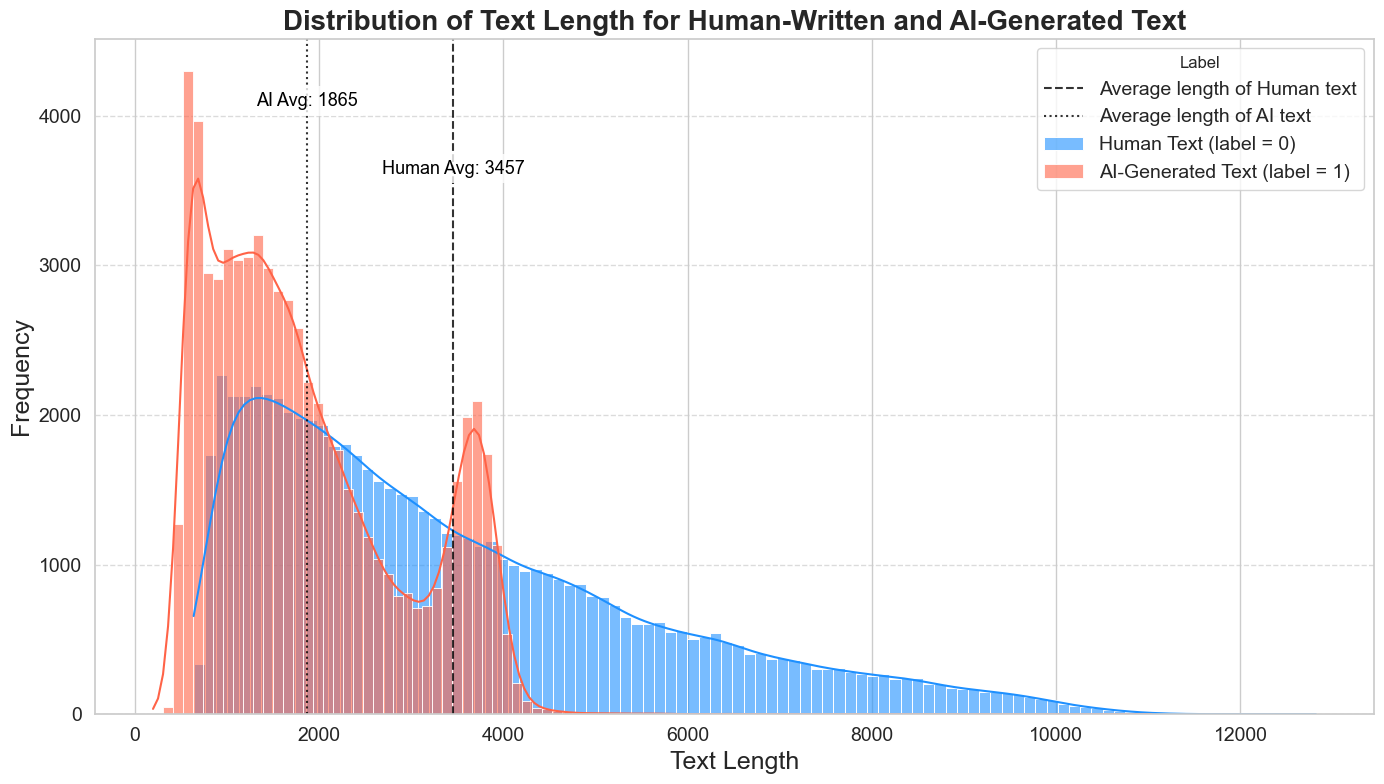

In [ ]:
# Calculate average (mean) text length for each group
human_avg = df[df['label'] == 0]['text_length'].mean()
ai_avg = df[df['label'] == 1]['text_length'].mean()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))

# Histogram for human text (label = 0)
sns.histplot(
    df[df['label'] == 0]['text_length'], 
    bins=100, 
    kde=True, 
    color=human_color, 
    label='Human Text (label = 0)', 
    alpha=0.6
)

# Histogram for AI-generated text (label = 1)
sns.histplot(
    df[df['label'] == 1]['text_length'], 
    bins=100, 
    kde=True, 
    color=ai_color, 
    label='AI-Generated Text (label = 1)', 
    alpha=0.6
)

# Add vertical lines for average text length values
plt.axvline(human_avg, color='black', linestyle='--', label='Average length of Human text', alpha=0.8)
plt.axvline(ai_avg, color='black', linestyle=':', label='Average length of AI text', alpha=0.8)

plt.text(
    human_avg, 
    plt.ylim()[1] * 0.8, 
    f"Human Avg: {int(human_avg)}", 
    color='black', 
    fontsize=13, 
    ha='center', 
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')
)
plt.text(
    ai_avg, 
    plt.ylim()[1] * 0.9, 
    f"AI Avg: {int(ai_avg)}", 
    color='black', 
    fontsize=13, 
    ha='center', 
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')
)


# Add titles, labels and legend
plt.title('Distribution of Text Length for Human-Written and AI-Generated Text', fontsize=20, weight='bold')
plt.xlabel('Text Length', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.legend(title="Label", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

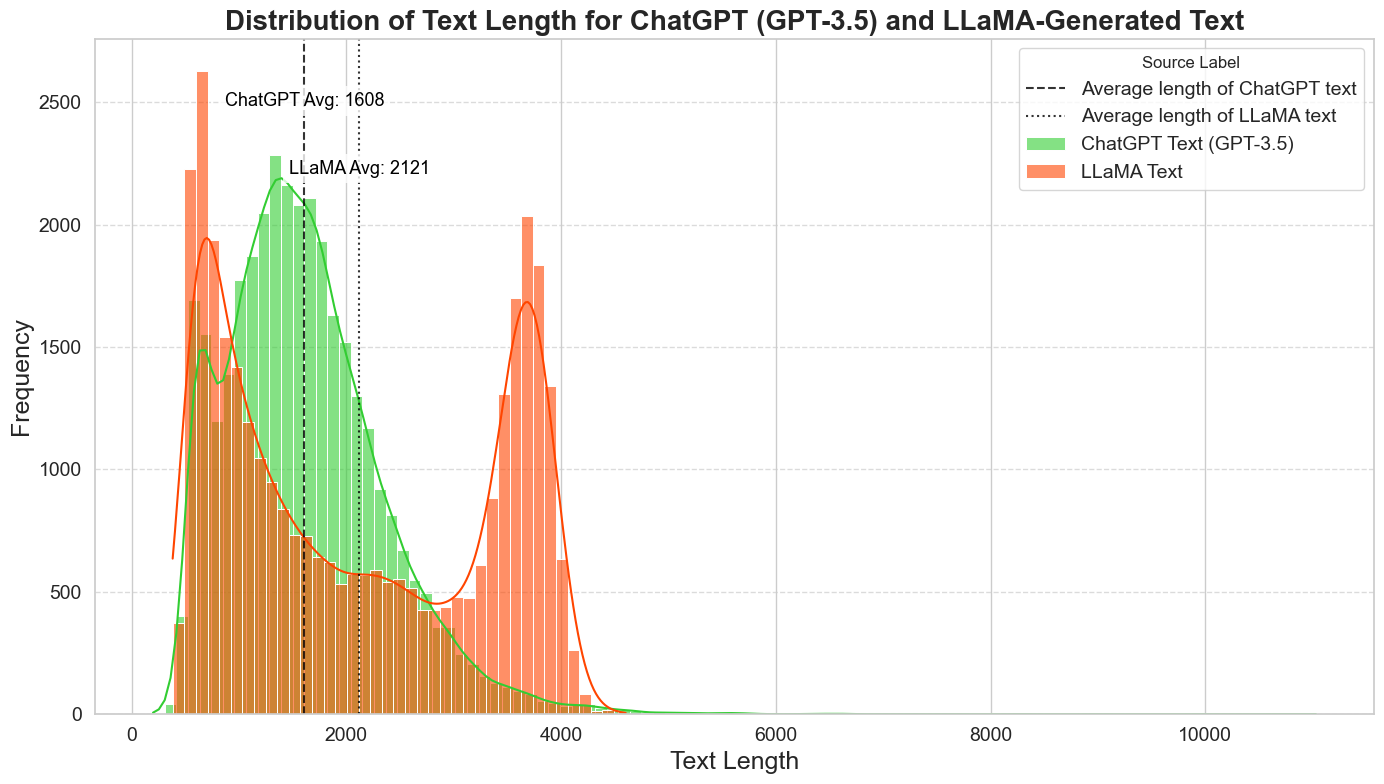

In [ ]:
# Calculate average (mean) text length for each group
chatgpt_avg = df[df['source'] == 'chatgpt']['text_length'].mean()
llama_avg = df[df['source'] == 'llama']['text_length'].mean()

# Get the range of text lengths (min and max values) for both ChatGPT and LLaMA
text_length_min = min(df[df['source'] == 'chatgpt']['text_length'].min(), df[df['source'] == 'llama']['text_length'].min())
text_length_max = max(df[df['source'] == 'chatgpt']['text_length'].max(), df[df['source'] == 'llama']['text_length'].max())

# Define the number of bins for the histogram
num_bins = 100

# Calculate the bin width based on the range of the data
bin_width = int((text_length_max - text_length_min) / num_bins)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))

# Histogram for ChatGPT-generated text (label = 'chatgpt')
sns.histplot(
    df[df['source'] == 'chatgpt']['text_length'], 
    bins=int((text_length_max - text_length_min) / bin_width),  # Use calculated bin width
    binwidth=bin_width,  # Set the bin width
    kde=True, 
    color=chatgpt_color, 
    label='ChatGPT Text (GPT-3.5)', 
    alpha=0.6
)

# Histogram for LLaMA-generated text (label = 'llama')
sns.histplot(
    df[df['source'] == 'llama']['text_length'], 
    bins=int((text_length_max - text_length_min) / bin_width),  # Use the same bin width
    binwidth=bin_width,  # Set the bin width
    kde=True, 
    color=llama_color, 
    label='LLaMA Text', 
    alpha=0.6
)

# Add vertical lines for average values
plt.axvline(chatgpt_avg, color='black', linestyle='--', label='Average length of ChatGPT text', alpha=0.8)
plt.axvline(llama_avg, color='black', linestyle=':', label='Average length of LLaMA text', alpha=0.8)

plt.text(
    chatgpt_avg, 
    plt.ylim()[1] * 0.9, 
    f"ChatGPT Avg: {int(chatgpt_avg)}", 
    color='black', 
    fontsize=13, 
    ha='center', 
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')
)
plt.text(
    llama_avg, 
    plt.ylim()[1] * 0.8, 
    f"LLaMA Avg: {int(llama_avg)}", 
    color='black', 
    fontsize=13, 
    ha='center', 
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')
)

# Add titles, labels and legend
plt.title('Distribution of Text Length for ChatGPT (GPT-3.5) and LLaMA-Generated Text', fontsize=20, weight='bold')
plt.xlabel('Text Length', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.legend(title="Source Label", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Word count visuals complex

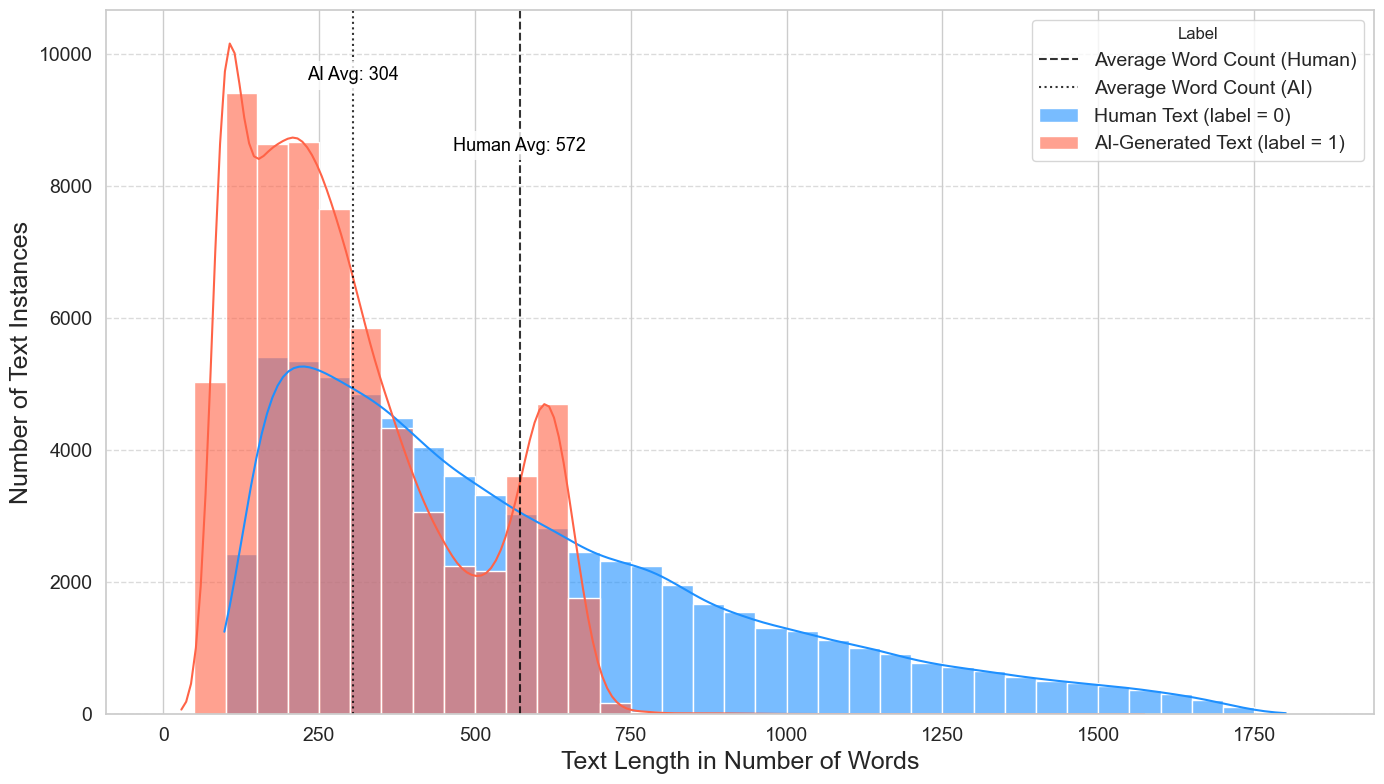

In [ ]:
# Calculate average (mean) word count for each group
human_avg_word = df[df['label'] == 0]['token_length'].mean()
ai_avg_word = df[df['label'] == 1]['token_length'].mean()

# Calculate bin edges with a bin size of 50
bin_edges = range(0, int(df['token_length'].max()) + 50, 50)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))

# Histogram for human text (label = 0)
sns.histplot(
    df[df['label'] == 0]['token_length'], 
    bins=bin_edges, 
    kde=True, 
    color=human_color, 
    label='Human Text (label = 0)', 
    alpha=0.6
)

# Histogram for AI-generated text (label = 1)
sns.histplot(
    df[df['label'] == 1]['token_length'], 
    bins=bin_edges, 
    kde=True, 
    color=ai_color, 
    label='AI-Generated Text (label = 1)', 
    alpha=0.6
)

# Add vertical lines for average values
plt.axvline(human_avg_word, color='black', linestyle='--', label='Average Word Count (Human)', alpha=0.8)
plt.axvline(ai_avg_word, color='black', linestyle=':', label='Average Word Count (AI)', alpha=0.8)

plt.text(
    human_avg_word, 
    plt.ylim()[1] * 0.8, 
    f"Human Avg: {int(human_avg_word)}", 
    color='black', 
    fontsize=13, 
    ha='center', 
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')
)
plt.text(
    ai_avg_word, 
    plt.ylim()[1] * 0.9, 
    f"AI Avg: {int(ai_avg_word)}", 
    color='black', 
    fontsize=13, 
    ha='center', 
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')
)

# Add titles, labels and legend
plt.xlabel('Text Length in Number of Words', fontsize=18)
plt.ylabel('Number of Text Instances', fontsize=18)
plt.legend(title="Label", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


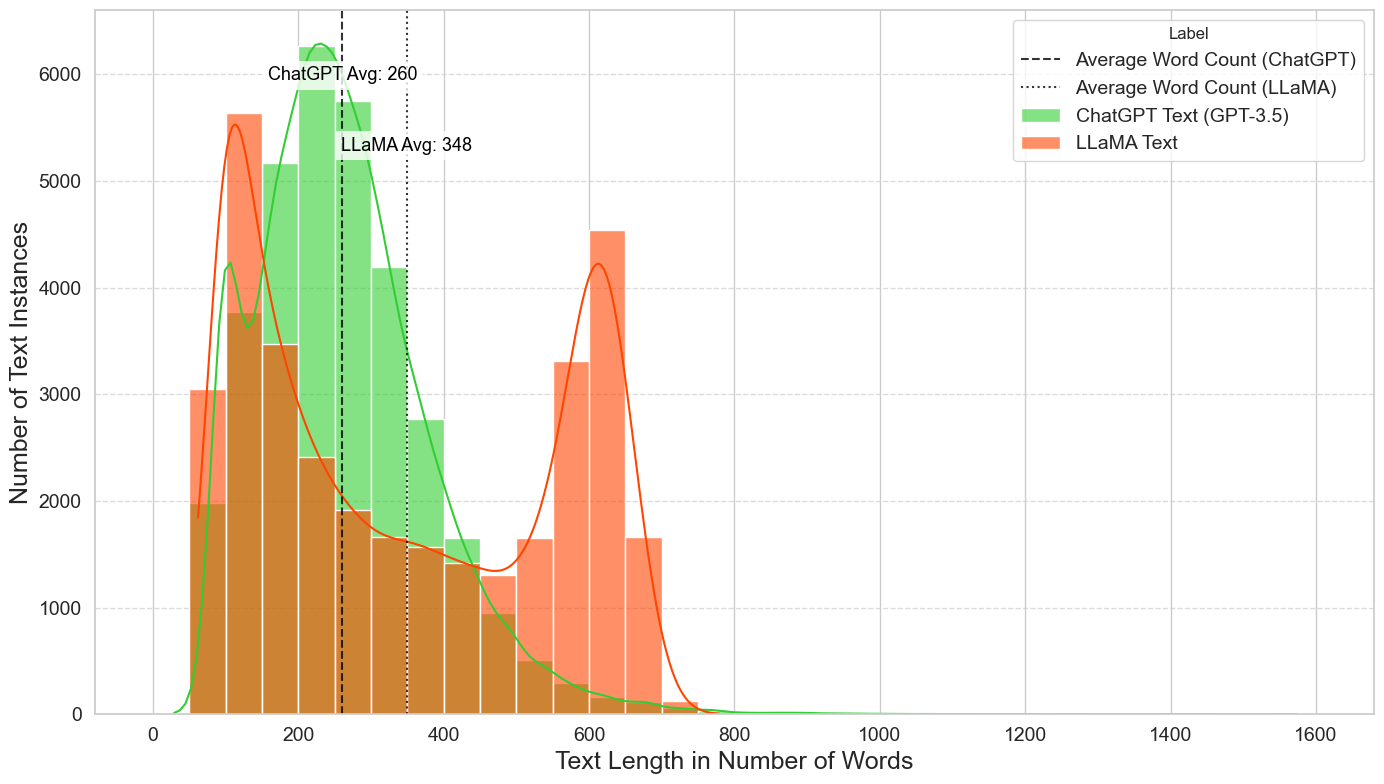

In [19]:
# Calculate average (mean) word count for each group
chatgpt_avg_word = df[df['source'] == 'chatgpt']['token_length'].mean()
llama_avg_word = df[df['source'] == 'llama']['token_length'].mean()

# Calculate bin edges with a bin size of 50
bin_edges = range(0, max(int(df[df['source'] == 'chatgpt']['token_length'].max()) + 50, 
                         int(df[df['source'] == 'llama']['token_length'].max()) + 50), 50)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))

# Histogram for ChatGPT-generated text (source = 'chatgpt')
sns.histplot(
    df[df['source'] == 'chatgpt']['token_length'], 
    bins=bin_edges,  # Use bin edges calculated from bin size
    kde=True, 
    color=chatgpt_color, 
    label='ChatGPT Text (GPT-3.5)', 
    alpha=0.6
)

# Histogram for LLaMA-generated text (source = 'llama')
sns.histplot(
    df[df['source'] == 'llama']['token_length'], 
    bins=bin_edges,  # Use the same bin edges
    kde=True, 
    color=llama_color, 
    label='LLaMA Text', 
    alpha=0.6
)

# Add vertical lines for average values
plt.axvline(chatgpt_avg_word, color='black', linestyle='--', label='Average Word Count (ChatGPT)', alpha=0.8)
plt.axvline(llama_avg_word, color='black', linestyle=':', label='Average Word Count (LLaMA)', alpha=0.8)

# Annotate the average values
plt.text(
    chatgpt_avg_word, 
    plt.ylim()[1] * 0.9, 
    f"ChatGPT Avg: {int(chatgpt_avg_word)}", 
    color='black', 
    fontsize=13, 
    ha='center', 
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')
)
plt.text(
    llama_avg_word, 
    plt.ylim()[1] * 0.8, 
    f"LLaMA Avg: {int(llama_avg_word)}", 
    color='black', 
    fontsize=13, 
    ha='center', 
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')
)

# Add titles, labels and legend
plt.xlabel('Text Length in Number of Words', fontsize=18)
plt.ylabel('Number of Text Instances', fontsize=18)
plt.legend(title="Label", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()